# FFT on ACF (detrended series)

Notas:
* Existe mais de um jeito de fazer o detrend. Fonte: https://machinelearningmastery.com/time-series-trends-in-python/
    >Quais as diferenças entre eles? Qual escolher?
    

# 1. Load and visualize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
city='Portland'
data = pd.read_csv('../data/temperature.csv',
                      usecols=['datetime', city],
                      parse_dates=['datetime'],
                      index_col=['datetime'],
                      infer_datetime_format=True,
                      skiprows=[1])

In [3]:
data.head()

,Portland
datetime,
2012-10-01 13:00:00,282.080000
2012-10-01 14:00:00,282.083252
2012-10-01 15:00:00,282.091866
2012-10-01 16:00:00,282.100481
2012-10-01 17:00:00,282.109095


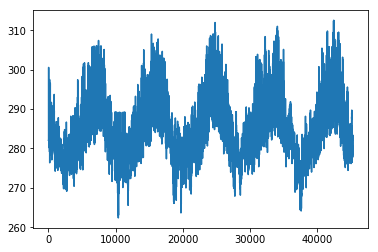

In [4]:
plt.plot([i for i in range(data.shape[0])], data[city])

## 2. ACF over regular series

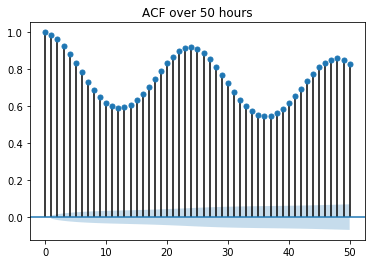

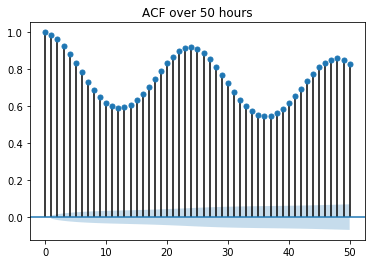

In [5]:
plot_acf(data[city], lags=50, title="ACF over 50 hours")

## 3. ACF over detrended (diferencing)

In [6]:
def detrend(data):
    diff = []
    for i in range(1, len(data)):
        value = data[i] - data[i - 1]
        diff.append(value)
    return diff

In [7]:
values = data[city].values

In [8]:
detrended = detrend(values)

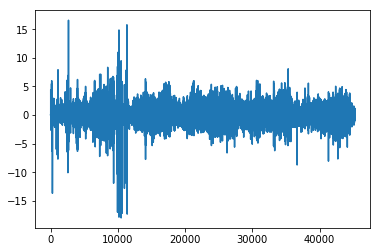

In [9]:
plt.plot([i for i in range(len(detrended))], detrended)

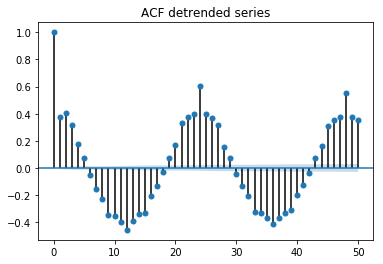

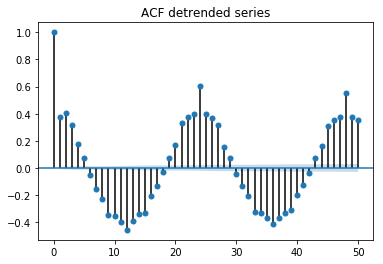

In [10]:
plot_acf(detrended, lags=50, title="ACF detrended series")

## 4. FFT on ACF (detrended series) - another implementation of ACF

A plot_acf não retorna os coeficientes de autocorrelação.  
Usando a implementação da matplotlib


In [11]:
def fft(data):
    magnitude = data

    # |?| Entender melhor a sampling frequency
    samplingFrequency = len(magnitude)
    fourierTransform = np.fft.fft(magnitude)

    # Frequency domain representation
    fourierTransform = fourierTransform/len(magnitude)           # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(magnitude)/2))] # Exclude sampling frequency

    tpCount     = len(magnitude)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod
    
    
    # remove sinal [?]
    frequencies = frequencies[1:]
    fourierTransform = fourierTransform[1:]

    return frequencies, fourierTransform

### 4.1 replotting the ACF - detrended data

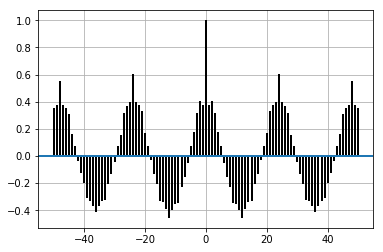

In [12]:
fig, ax0 = plt.subplots(1, 1, sharex=True)

result = ax0.acorr(detrended, usevlines=True, normed=True, maxlags=50, lw=2)
ax0.grid(True)

plt.show()

In [13]:
autocorrelation_coeficients = result[1]

In [14]:
frequencies, fourier = fft(autocorrelation_coeficients)

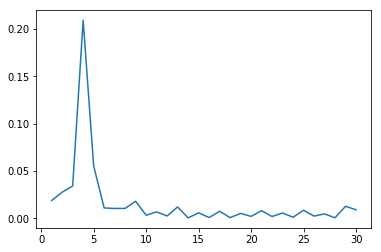

In [15]:
plt.plot(frequencies[:30], abs(fourier)[:30])

# Ordered signals by frequency

In [16]:
ziped_freqs = list(zip(frequencies, fourier))

In [17]:
sorted_by_freqs = sorted(ziped_freqs, key=lambda tup: tup[1])

In [18]:
print("frequency signal, fft")
for i, item in enumerate(sorted_by_freqs[:10]):
    print(i+1, ":", item)

frequency signal, fft
1 : (5.0, (-0.054769793822676806-0.008587387383325765j))
2 : (9.0, (-0.01747425492202847-0.005023736241034499j))
3 : (13.0, (-0.01121424997372631-0.004799095058011719j))
4 : (6.0, (-0.010926092330874711-0.0020631377653052606j))
5 : (7.0, (-0.010305967171859602-0.0022801072348174107j))
6 : (29.0, (-0.007974888854758444-0.010091864047974984j))
7 : (17.0, (-0.006584251679847539-0.003847068150219305j))
8 : (11.0, (-0.006568344877899118-0.0023393940009041546j))
9 : (21.0, (-0.006523401209131773-0.004992162602084041j))
10 : (25.0, (-0.00619719799509649-0.006101558240005132j))
